Trabalho Prático 1 - Disciplina de Computação Gráfica – 2024

Dupla:
*   Deise Santana dos Santos
*   Friedrich Naum Espíndola

In [19]:
%pip install lxml
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
''' Bibliotecas '''
from lxml import etree
import matplotlib.pyplot as plt

In [21]:
# Leitura do arquivo XML
tree = etree.parse("entrada.xml")

In [22]:
# Classes
class Window:
    def __init__(self, xwmin, ywmin, xwmax, ywmax):
        self.xwmin = float(xwmin)
        self.ywmin = float(ywmin)
        self.xwmax = float(xwmax)
        self.ywmax = float(ywmax)

class Dot:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)

class Line:
    def __init__(self, dot1, dot2):
        self.dot1 = dot1
        self.dot2 = dot2

class Polygon:
    def __init__(self, dots):
        self.dots = dots

class Viewport:
    def __init__(self, xvmin, yvmin, xvmax, yvmax):
        self.xvmin = float(xvmin)
        self.yvmin = float(yvmin)
        self.xvmax = float(xvmax)
        self.yvmax = float(yvmax)

    def transform(self, xw, yw):
        self.xw = xw
        self.yw = yw
        xv = ((xw - window.xwmin) / (window.xwmax - window.xwmin)) * (self.xvmax - self.xvmin)
        yv = (1 - ((yw - window.ywmin) / (window.ywmax - window.ywmin))) * (self.yvmax - self.yvmin)
        return xv, yv

In [23]:
# Busca dos Elementos -> Viewport
viewport_xml = tree.find("./viewport")

xvmin = viewport_xml.find("vpmin").get("x")
yvmin = viewport_xml.find("vpmin").get("y")
xvmax = viewport_xml.find("vpmax").get("x")
yvmax = viewport_xml.find("vpmax").get("y")

viewport = Viewport(xvmin, yvmin, xvmax, yvmax)

In [24]:
# Busca dos Elementos -> Window
window_xml = tree.find("./window")

xwmin = window_xml.find("wmin").get("x")
ywmin = window_xml.find("wmin").get("y")
xwmax = window_xml.find("wmax").get("x")
ywmax = window_xml.find("wmax").get("y")

window = Window(xwmin, ywmin, xwmax, ywmax)

In [25]:
# Busca dos Elementos -> Dots
dots_xml = tree.findall("./ponto")

dots = []

for dot_xml in dots_xml:
    x = dot_xml.attrib['x']
    y = dot_xml.attrib['y']
    dot = Dot(x, y)
    dots.append(dot)

In [26]:
# Busca dos Elementos -> Lines
lines_xml = tree.findall("./reta")

lines = []

for line_xml in lines_xml:
  x1 = line_xml[0].attrib['x']
  y1 = line_xml[0].attrib['y']

  dot1 = Dot(x1, y1)

  x2 = line_xml[1].attrib['x']
  y2 = line_xml[1].attrib['y']

  dot2 = Dot(x2, y2)

  line = Line(dot1, dot2)

  lines.append(line)

In [27]:
# Busca dos Elementos -> Polygons
polygons_xml = tree.findall("./poligono")

polygons = []

for polygon_xml in polygons_xml:
  dots_polygon = []

  for dot_xml in polygon_xml.findall("./ponto"):
      x = dot_xml.attrib['x']
      y = dot_xml.attrib['y']
      dot = Dot(x, y)
      dots_polygon.append(dot)

  polygons.append(dots_polygon)

<Figure size 1000x1000 with 0 Axes>

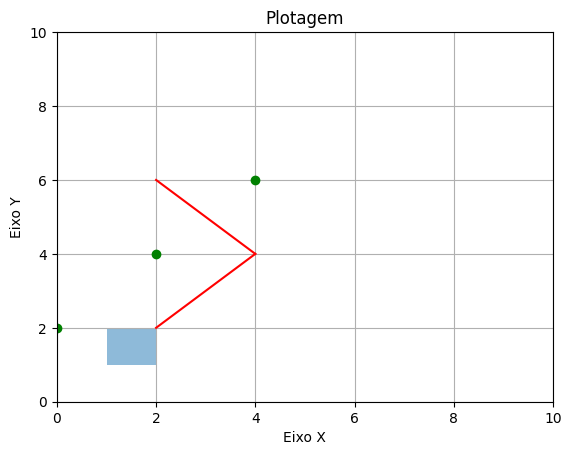

In [28]:
# Plotagem - Todos
xwmax = float(window.xwmax)
ywmax = float(window.ywmax)

plt.figure(figsize=(xwmax, ywmax))

fig = plt.figure()
ax = fig.add_subplot(111)

for dot in dots:
    ax.plot(dot.x, dot.y, 'go')

for line in lines:
    ax.plot([line.dot1.x, line.dot2.x], [line.dot1.y, line.dot2.y], 'r-')

for polygon in polygons:
    x_values = [dot.x for dot in polygon]
    y_values = [dot.y for dot in polygon]
    ax.fill(x_values, y_values, alpha=0.5)

ax.set_xlim(0, xwmax)
ax.set_ylim(0, ywmax)

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_title('Plotagem')
ax.grid(True)
plt.show()

In [29]:
# Aplicando Transformada - Dots
dots_transform = []

for dot in dots:
    xv, yv = viewport.transform(dot.x, dot.y)
    dot_v = Dot(xv, yv)
    dots_transform.append(dot_v)

In [30]:
# Aplicando Transformada - Lines
lines_transform = []

for line in lines:
    xv1, yv1 = viewport.transform(line.dot1.x, line.dot1.y)
    xv2, yv2 = viewport.transform(line.dot2.x, line.dot2.y)

    dot_v1 = Dot(xv1, yv1)
    dot_v2 = Dot(xv2, yv2)

    line = Line(dot_v1, dot_v2)

    lines_transform.append(line)

In [31]:
# Aplicando Transformada - Polygons
polygon_transform = []

for polygon in polygons:
    dots_polygon_transform = []

    for dot in polygon:
      xv, yv = viewport.transform(dot.x, dot.y)
      dot_v = Dot(xv, yv)
      dots_polygon_transform.append(dot_v)

    polygon_transform.append(dots_polygon_transform)

In [32]:
# Escrita no arquivo XML
tree_out = etree.Element("dados")

In [33]:
# Criando elemento xml para Dots
dots_transform_xml = etree.SubElement(tree_out, "pontos")

for dot in dots_transform:
    dot_xml = etree.SubElement(dots_transform_xml, "ponto", x=str(dot.x), y=str(dot.y))

In [34]:
# Criando o elemento para as linhas transformadas
lines_transform_xml = etree.SubElement(tree_out, "retas")

for line in lines_transform:
    line_xml = etree.SubElement(lines_transform_xml, "reta")
    dot_xml_1 = etree.SubElement(line_xml, "ponto", x=str(line.dot1.x), y=str(line.dot1.y))
    dot_xml_2 = etree.SubElement(line_xml, "ponto", x=str(line.dot2.x), y=str(line.dot2.y))

In [35]:
# Criando o elemento para os polígonos transformados
polygon_transform_xml = etree.SubElement(tree_out, "poligonos")

for polygon in polygon_transform:
    poligono_xml = etree.SubElement(polygon_transform_xml, "poligono")
    for dot in polygon:
        dot_xml = etree.SubElement(poligono_xml, "ponto", x=str(dot.x), y=str(dot.y))

In [36]:
tree = etree.ElementTree(tree_out)

tree.write("saida.xml", pretty_print=True, xml_declaration=True, encoding="utf-8")

Referências:

https://docs.python.org/3/library/xml.etree.elementtree.html

Solução pip: https://pt.stackoverflow.com/a/240469/349226